In [2]:
#导入数据分析需要的包
import pandas as pd
import numpy as np
#可视化包
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#忽略警告信息
import warnings
warnings.filterwarnings('ignore')
#导入数据集
df=pd.read_csv('/home/leonwoo/ML/input/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#查看数据
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce') #强制转换数字(包括字符串)

In [5]:
df.isnull().sum()  #查看缺失值

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
print(df[df['TotalCharges']!=df['TotalCharges']][['tenure','MonthlyCharges','TotalCharges']])  #定位缺失值所在行

      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN


In [7]:
#将总消费额填充为月消费额
df.loc[:,'TotalCharges'].replace(to_replace=np.nan,value=df.loc[:,'MonthlyCharges'],inplace=True)
#查看是否替换成功
print(df[df['tenure']==0][['tenure','MonthlyCharges','TotalCharges']])

      tenure  MonthlyCharges  TotalCharges
488        0           52.55         52.55
753        0           20.25         20.25
936        0           80.85         80.85
1082       0           25.75         25.75
1340       0           56.05         56.05
3331       0           19.85         19.85
3826       0           25.35         25.35
4380       0           20.00         20.00
5218       0           19.70         19.70
6670       0           73.35         73.35
6754       0           61.90         61.90


In [8]:
df['Churn'].replace(to_replace = 'Yes', value = 1,inplace = True)
df['Churn'].replace(to_replace = 'No', value = 0,inplace = True)
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [9]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder               # 编码转换
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
scaler = StandardScaler(copy=False)
scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

array([[-1.27744458, -1.16032292, -0.99266722],
       [ 0.06632742, -0.25962894, -0.17219813],
       [-1.23672422, -0.36266036, -0.95812162],
       ...,
       [-0.87024095, -1.1686319 , -0.85298475],
       [-1.15528349,  0.32033821, -0.87056638],
       [ 1.36937906,  1.35896134,  2.01392524]])

In [11]:
#利用transform函数实现标准化
df[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(df[['tenure','MonthlyCharges','TotalCharges']])

In [12]:
# 查看对象类型字段中存在的值
def uni(columnlabel):
    print(columnlabel,"--" ,df[columnlabel].unique())  # unique函数去除其中重复的元素，返回唯一值
    
dfobject=df.select_dtypes(['object'])
for i in range(0,len(dfobject.columns)):
    uni(dfobject.columns[i])


customerID -- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender -- ['Female' 'Male']
Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
PhoneService -- ['No' 'Yes']
MultipleLines -- ['No phone service' 'No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes' 'No internet service']
OnlineBackup -- ['Yes' 'No' 'No internet service']
DeviceProtection -- ['No' 'Yes' 'No internet service']
TechSupport -- ['No' 'Yes' 'No internet service']
StreamingTV -- ['No' 'Yes' 'No internet service']
StreamingMovies -- ['No' 'Yes' 'No internet service']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [13]:
df.replace(to_replace='No internet service', value='No', inplace=True)
df.replace(to_replace='No phone service', value='No', inplace=True)
#再次查看
for i in range(0,len(dfobject.columns)):
    uni(dfobject.columns[i])

customerID -- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender -- ['Female' 'Male']
Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
PhoneService -- ['No' 'Yes']
MultipleLines -- ['No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes']
OnlineBackup -- ['Yes' 'No']
DeviceProtection -- ['No' 'Yes']
TechSupport -- ['No' 'Yes']
StreamingTV -- ['No' 'Yes']
StreamingMovies -- ['No' 'Yes']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [14]:
# 使用Scikit-learn标签编码,将离散特征转换为整数编码
def labelencode(columnlabel):
    df[columnlabel] = LabelEncoder().fit_transform(df[columnlabel])
    
for i in range(0,len(dfobject.columns)):
    labelencode(dfobject.columns[i])
    
for i in range(0,len(dfobject.columns)):
    uni(dfobject.columns[i])

customerID -- [5375 3962 2564 ... 3367 5934 2226]
gender -- [0 1]
Partner -- [1 0]
Dependents -- [0 1]
PhoneService -- [0 1]
MultipleLines -- [0 1]
InternetService -- [0 1 2]
OnlineSecurity -- [0 1]
OnlineBackup -- [1 0]
DeviceProtection -- [0 1]
TechSupport -- [0 1]
StreamingTV -- [0 1]
StreamingMovies -- [0 1]
Contract -- [0 1 2]
PaperlessBilling -- [1 0]
PaymentMethod -- [2 3 0 1]


In [15]:
#查看转化后的数据
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,-1.277445,0,0,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.992667,0
1,3962,1,0,0,0,0.066327,1,0,0,1,...,1,0,0,0,1,0,3,-0.259629,-0.172198,0
2,2564,1,0,0,0,-1.236724,1,0,0,1,...,0,0,0,0,0,1,3,-0.362660,-0.958122,1
3,5535,1,0,0,0,0.514251,0,0,0,1,...,1,1,0,0,1,0,0,-0.746535,-0.193706,0
4,6511,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.938930,1


Text(0.5, 1, 'Correlation between variables')

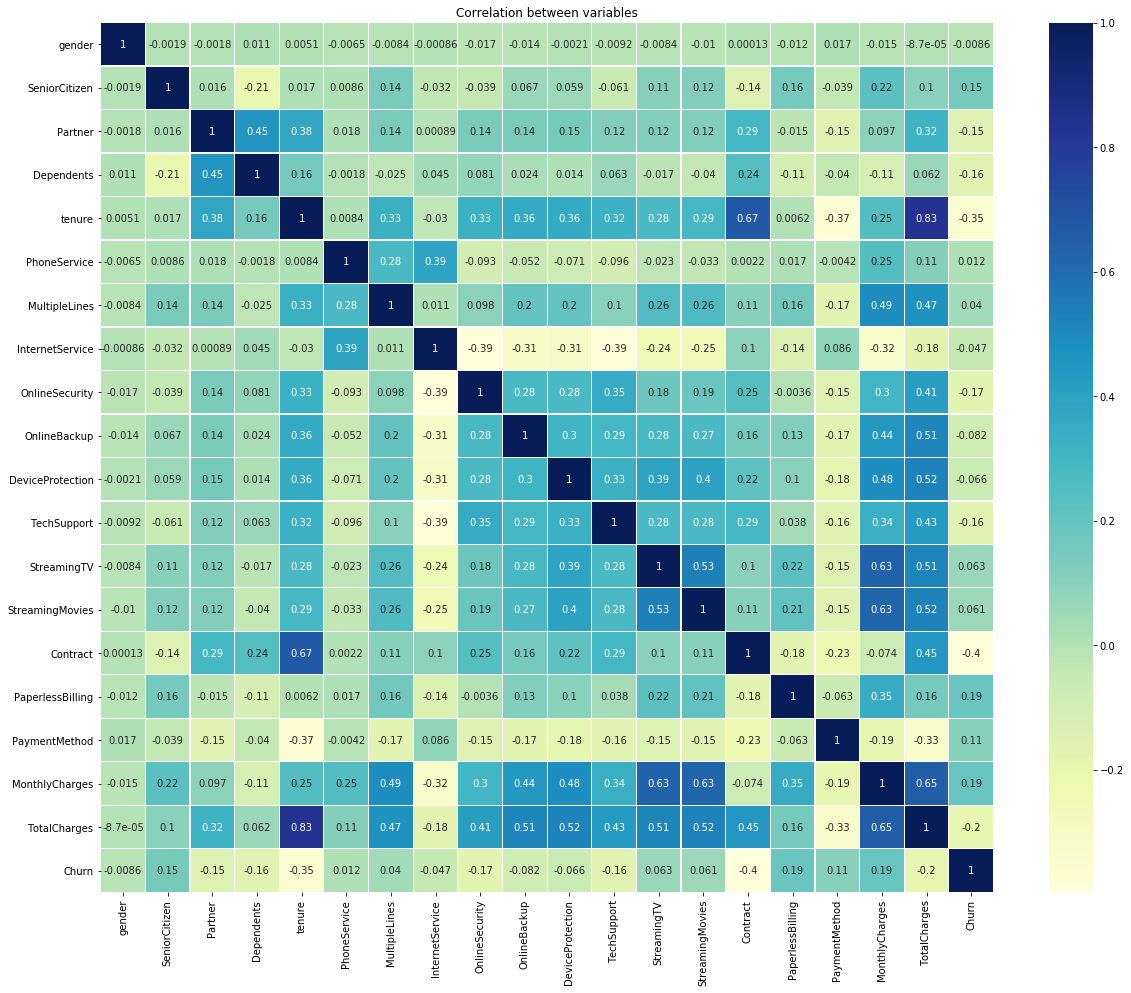

In [16]:
# CustomerID表示每个客户的标识，对后续建模不影响，这里选择删除CustomerID列
df.drop("customerID",axis=1, inplace=True)
# 构造相关性矩阵
corr = df.corr()
#热力图展示
plt.figure(figsize=(20,16))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=0.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")

Text(0.5, 1.0, 'Correlations between Churn and variables')

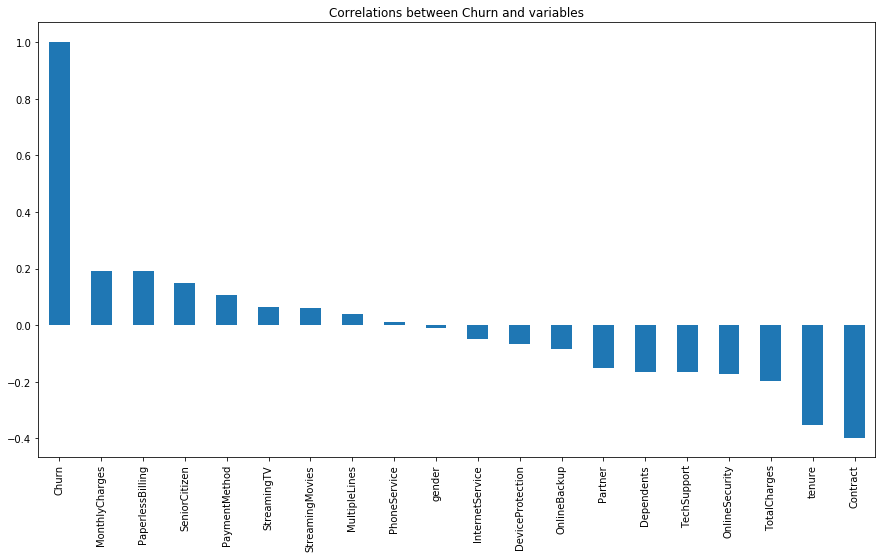

In [17]:
# 电信用户是否流失与各变量之间的相关性
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.title("Correlations between Churn and variables")

In [18]:
# 特征选择
dropFea = ['gender','PhoneService']
df.drop(dropFea, inplace=True, axis =1)

X=df.copy()
X.drop(['Churn'],axis=1, inplace=True)
y=df["Churn"]
#查看预处理后的数据
X.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,-1.277445,0,0,0,1,0,0,0,0,0,1,2,-1.160323,-0.992667
1,0,0,0,0.066327,0,0,1,0,1,0,0,0,1,0,3,-0.259629,-0.172198
2,0,0,0,-1.236724,0,0,1,1,0,0,0,0,0,1,3,-0.362660,-0.958122
3,0,0,0,0.514251,0,0,1,0,1,1,0,0,1,0,0,-0.746535,-0.193706
4,0,0,0,-1.236724,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938930


Text(0, 0.5, 'Frequency')

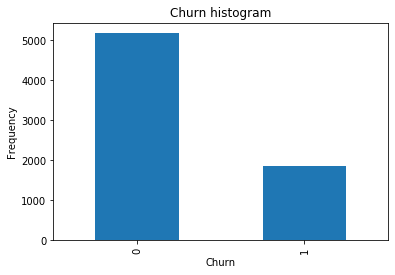

In [19]:
count_Churn = pd.value_counts(df['Churn'], sort = True).sort_index()
count_Churn.plot(kind = 'bar')
plt.title("Churn histogram")
plt.xlabel("Churn")
plt.ylabel("Frequency")

In [20]:
#下采样方案实现过程
number_records_Churn = len(df[df.Churn == 1])   #计算 Churn=1的样本的数量
Churn_indices = np.array(df[df.Churn == 1].index)  # 取出Churn=1的样本对应的行索引

normal_indices = df[df.Churn == 0].index  # 取出Churn=0样本对应的行索引

random_normal_indices = np.random.choice(normal_indices, number_records_Churn, replace = False) #随机选择和number_records_Churn一致的正常用户样本量
random_normal_indices = np.array(random_normal_indices)         #转换成numpy的格式       

under_sample_indices = np.concatenate([Churn_indices,random_normal_indices])  #将正负样本拼接在一起

#下采样数据集
under_sample_data = df.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Churn']  #下采样数据集的数据，可以理解为自变量
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Churn']  #下采样数据集的lable，可以理解为因变量

# 查看正负各自占比
print("Percentage of Churn_no: ", len(under_sample_data[under_sample_data.Churn == 0])/len(under_sample_data))
print("Percentage of Churn_yes: ", len(under_sample_data[under_sample_data.Churn == 1])/len(under_sample_data))
#查看总数
print("Total number of Churn in resampled data: ", len(under_sample_data))

Percentage of Churn_no:  0.5
Percentage of Churn_yes:  0.5
Total number of Churn in resampled data:  3738


In [21]:
from sklearn.model_selection import train_test_split

# 把整体数据集进行切分
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)# test_size = 0.3, 表示30%的数据作为测试集合，即剩余70%的数据作为训练集；state=0在切分时进行数据重洗牌 的标识位。
print("原始训练集包含样本数量: ", len(X_train))
print("原始测试集包含样本数量:  ", len(X_test))
print("原始样本总数: ", len(X_train)+len(X_test))

#对下采样数据样本进行切分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample ,y_undersample,test_size = 0.3,random_state = 0)
print("")
print("训练集包含样本数量: ", len(X_train_undersample))
print("测试集包含样本数量:  ", len(X_test_undersample))
print("样本总数:", len(X_train_undersample)+len(X_test_undersample))

原始训练集包含样本数量:  4930
原始测试集包含样本数量:   2113
原始样本总数:  7043

训练集包含样本数量:  2616
测试集包含样本数量:   1122
样本总数: 3738


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

#Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report
from sklearn.model_selection import cross_val_predict, KFold, cross_val_score

#print(help(KFold))

def printing_Kfold_scores(x_train_data,y_train_data):
    #fold = KFold(len(y_train_data),5,shuffle=False)
    fold = KFold(5,shuffle=False)

    # 定义不同力度的正则化惩罚力度
    c_param_range = [0.01,0.1,1,10,100]
    # 展示结果用的表格
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # k-fold 表示K折的交叉验证，这里会得到两个索引集合: 训练集 = indices[0], 验证集 = indices[1]
    j = 0
    #循环遍历不同的参数
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('正则化惩罚力度: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []

        #下面来分解执行交叉验证
        #for iteration, indices in enumerate(fold,start=1):
        for iteration, indices in enumerate(fold.split(x_train_data)):

            # 指定算法模型，并且给定参数
            #lr = LogisticRegression(C = c_param, penalty = 'l1')
            lr = LogisticRegression(C = c_param, penalty = 'l1',solver='liblinear')

            # 训练模型，注意索引不要给错，训练的时候一定传入的是训练集，所以X和Y的索引都是0
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # 建立好模型后，预测模型结果，这里用的就是验证集，索引为1
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # 有了预测结果之后就可以来进行评估了，这里recall_score需要传入预测值和真实值。
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': 召回率 = ', recall_acc)


        # 当执行完所有的交叉验证后，计算平均结果
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')

    #找到最好的参数，Recall越高，效果越好
    best_c = results_table.loc[results_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']

    # 打印最好的结果
    print('*********************************************************************************')
    print('效果最好的模型所选参数 = ', best_c)
    print('*********************************************************************************')

    return best_c

#交叉验证与不同参数结果
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample) 

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.8362369337979094
Iteration  1 : 召回率 =  0.8392156862745098
Iteration  2 : 召回率 =  0.8255813953488372
Iteration  3 : 召回率 =  0.8300395256916996
Iteration  4 : 召回率 =  0.8

平均召回率  0.8262147082225912

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.8048780487804879
Iteration  1 : 召回率 =  0.792156862745098
Iteration  2 : 召回率 =  0.810077519379845
Iteration  3 : 召回率 =  0.8300395256916996
Iteration  4 : 召回率 =  0.7764705882352941

平均召回率  0.8027245089664851

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.8153310104529616
Iteration  1 : 召回率 =  0.803921568627451
Iteration  2 : 召回率 =  0.813953488372093
Iteration  3 : 召回率 =  0.8181818181818182
Iteration  4 : 召回率 =  0.792156862745098

平均召回率  0.8087089496758845

-------------

In [23]:
def plot_confusion_matrix(cm, classes,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        绘制混淆矩阵
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

召回率:  0.7789661319073083


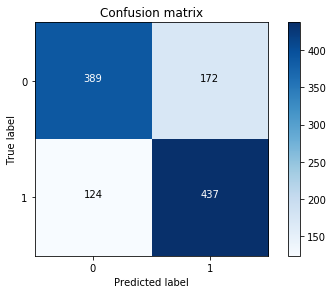

In [24]:
import itertools
# lr = LogisticRegression(C = best_c, penalty = 'l1')
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

召回率:  0.7938517179023508


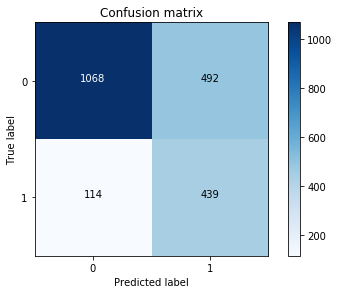

In [25]:
# lr = LogisticRegression(C = best_c, penalty = 'l1')
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

给定阈值为: 0.1 时测试集召回率:  0.9982174688057041
给定阈值为: 0.2 时测试集召回率:  0.9714795008912656
给定阈值为: 0.3 时测试集召回率:  0.9358288770053476
给定阈值为: 0.4 时测试集召回率:  0.8877005347593583
给定阈值为: 0.5 时测试集召回率:  0.7789661319073083
给定阈值为: 0.6 时测试集召回率:  0.6042780748663101
给定阈值为: 0.7 时测试集召回率:  0.35294117647058826
给定阈值为: 0.8 时测试集召回率:  0.0035650623885918
给定阈值为: 0.9 时测试集召回率:  0.0


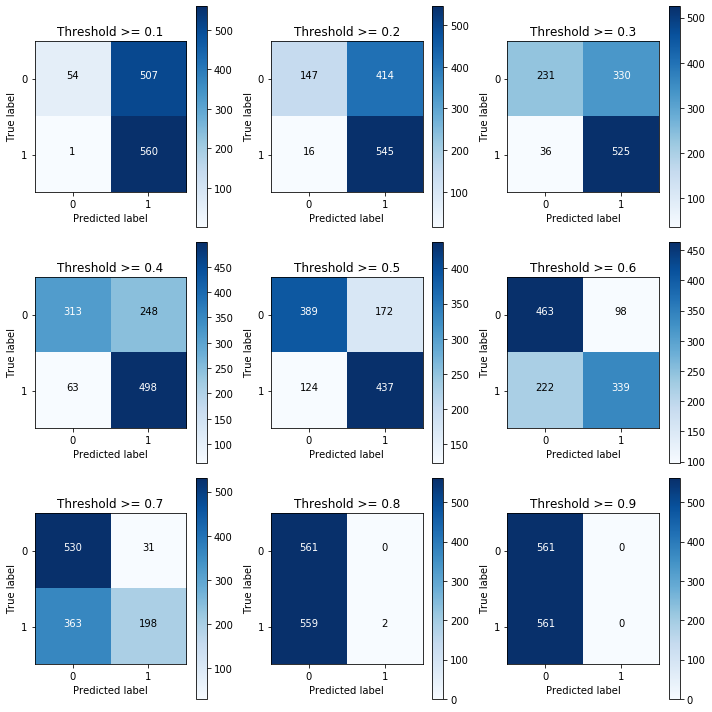

In [26]:
# 用之前最好的参数来进行建模
# lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr = LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')

# 训练模型，还是用下采样的数据集
lr.fit(X_train_undersample,y_train_undersample.values.ravel())

# 得到预测结果的概率值
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

#指定不同的阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1

# 用混淆矩阵来进行展示
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i

    plt.subplot(3,3,j)
    j += 1

    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("给定阈值为:",i,"时测试集召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)